# Serving

In [1]:
import tensorflow as tf
tf.__version__

/home/yatin/anaconda3/envs/deeplab4/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/yatin/anaconda3/envs/deeplab4/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/yatin/anaconda3/envs/deeplab4/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/yatin/anaconda3/envs/deeplab4/lib/pyt

'1.14.0'

In [5]:
from __future__ import print_function
from PIL import Image
from grpc.beta import implementations
# import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow_serving.apis import predict_pb2
from tensorflow_serving.apis import prediction_service_pb2
import requests
import numpy as np
import io

In [6]:
server = '127.0.0.1:8500'
host, port = server.split(':')

In [7]:
# response = requests.get(image_url)
# print(response.content.decode('utf-8'))
# i = io.StringIO(response.content.decode('utf-8'))
image = Image.open('f2.jpg')
image = np.array(image)
height = image.shape[0]
width = image.shape[1]
print("Image shape:", image.shape)

Image shape: (720, 1280, 3)


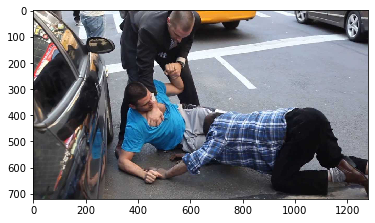

In [8]:
plt.imshow(image)
plt.show()

In [9]:
# create the RPC stub
channel = implementations.insecure_channel(host, int(port))
stub = prediction_service_pb2.beta_create_PredictionService_stub(channel)

/home/yatin/anaconda3/envs/deeplab4/lib/python3.7/site-packages/tensorflow_serving/apis/prediction_service_pb2.py:131: DeprecationWarning: beta_create_PredictionService_stub() method is deprecated. This method will be removed in near future versions of TF Serving. Please switch to GA gRPC API in prediction_service_pb2_grpc.
  'prediction_service_pb2_grpc.', DeprecationWarning)


In [10]:
# create the request object and set the name and signature_name params
request = predict_pb2.PredictRequest()
request.model_spec.name = 'deepnet'
request.model_spec.signature_name = 'predict_images'

In [11]:
# fill in the request object with the necessary data
request.inputs['images'].CopyFrom(tf.contrib.util.make_tensor_proto(image.astype(dtype=np.float32), shape=[1, height, width, 3]))

request.inputs['height'].CopyFrom(tf.contrib.util.make_tensor_proto(height, shape=[1]))
request.inputs['width'].CopyFrom(tf.contrib.util.make_tensor_proto(width, shape=[1]))

/home/yatin/anaconda3/envs/deeplab4/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/learn_io/generator_io.py:26: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Container
/home/yatin/anaconda3/envs/deeplab4/lib/python3.7/site-packages/tensorflow/contrib/labeled_tensor/python/ops/_typecheck.py:133: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  return (isinstance(instance, collections.Iterable) and
/home/yatin/anaconda3/envs/deeplab4/lib/python3.7/site-packages/tensorflow/contrib/labeled_tensor/python/ops/core.py:722: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  tc.Tuple(string_types, collectio

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [13]:
# sync requests
# result_future = stub.Predict(request, 30.)

# For async requests
result_future = stub.Predict.future(request, 10.)
result_future = result_future.result()

_Rendezvous: <_Rendezvous of RPC that terminated with:
	status = StatusCode.UNAVAILABLE
	details = "failed to connect to all addresses"
	debug_error_string = "{"created":"@1588256075.388322964","description":"Failed to pick subchannel","file":"src/core/ext/filters/client_channel/client_channel.cc","file_line":3818,"referenced_errors":[{"created":"@1588256075.388310147","description":"failed to connect to all addresses","file":"src/core/ext/filters/client_channel/lb_policy/pick_first/pick_first.cc","file_line":395,"grpc_status":14}]}"
>

In [ ]:
np.unique(image_mask,return_counts=True)

In [ ]:
# get the results
output = np.array(result_future.outputs['segmentation_map'].int64_val)
height = result_future.outputs['segmentation_map'].tensor_shape.dim[1].size
width = result_future.outputs['segmentation_map'].tensor_shape.dim[2].size

image_mask = np.reshape(output, (height, width))
plt.imshow(image_mask)
plt.show()

253,231,36

In [124]:
# image.shape

In [125]:
# np.unique(image_mask)

In [126]:
# image_mask==[253,231,36].

In [127]:
image_mask[np.where((image_mask==[253,231,36]).all())] = [255,255,255]
image_mask[np.where((image_mask==[68,1,84]).all())] = [0,0,0]
result = cv2.bitwise_and(image,image,mask = image_mask)

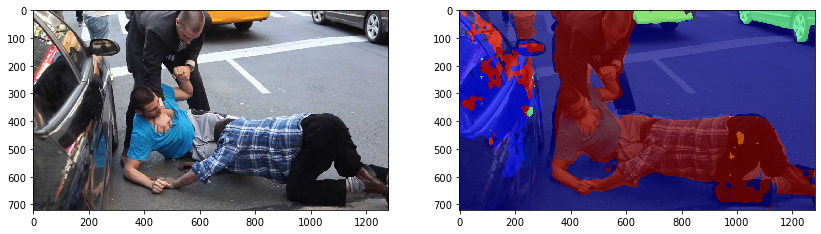

In [131]:
plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
plt.imshow(image, 'gray', interpolation='none')
plt.subplot(1,2,2)
plt.imshow(image, 'gray', interpolation='none')
plt.imshow(image_mask, 'jet', interpolation='none', alpha=0.7)
plt.show()

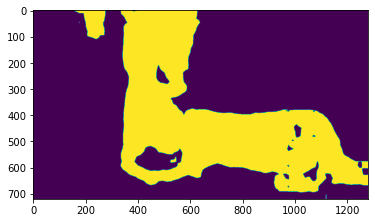

In [249]:
image_mask_copy = image_mask.copy()
np.place(image_mask_copy,image_mask_copy!=15,[0])
np.place(image_mask_copy,image_mask_copy==15,[255])
plt.imshow(image_mask_copy)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


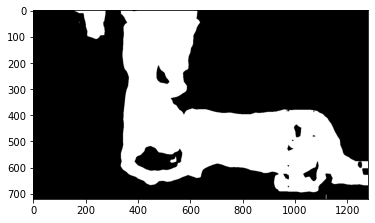

In [250]:
new_image_mask = np.expand_dims(image_mask_copy,-1)*np.ones((1,1,3))
plt.imshow(new_image_mask)

In [255]:
print(new_image_mask.shape,image.shape)
print(type(new_image_mask),type(image))

(720, 1280, 3) (720, 1280, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [232]:
np.unique(new_image_mask)

array([0., 1.])

In [233]:
import cv2

In [234]:
cv2.imwrite('mask.jpg',new_image_mask)

True

In [209]:
image_mask = cv2.imread('mask.jpg')

In [251]:
new_image = cv2.bitwise_and(image,new_image_mask)
plt.imshow(new_image)

error: OpenCV(3.4.2) /tmp/build/80754af9/opencv-suite_1535558553474/work/modules/core/src/arithm.cpp:223: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'binary_op'


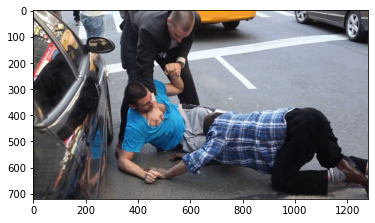

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


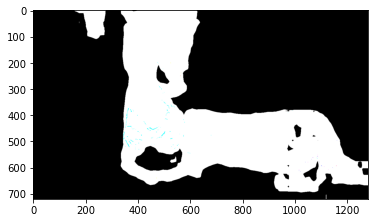

In [246]:
new_image = np.multiply(new_image_mask,image)
plt.imshow(new_image)

In [260]:
class Pixel:
    def __init__(self, x = 0, y= 0, red = 0, green = 0, blue = 0): 
        self._x = x
        self._y = y
        self._red = red
        self._green = green
        self._blue = blue
        self._print_color = False
        
    def set_coords(self, x, y):
        self._x = x
        self._y = y

    def set_grayscale(self):
        average = (self._red + self._blue + self._green)/3
        self._red = int(average)
        self._blue = int(average)
        self._green = int(average)
        if (self._blue ,self._green) == (0,0):
            self._print_color = 'red'
        if (self._red,self._green) == ():
            self._print_color = 'blue'
        if (self._red,self._blue) == ():
            self._print_color = 'green'

    def print_pixel_info(self):
        if self._print_color:
            print("X: {},Y: {}, Color: ({},{},{}) {}".format(self._x,self._y,self._red,self._green,self._blue,self._print_color))


def main():
    p = Pixel(5, 6, 250)
    p.print_pixel_info()
    p.set_grayscale()
    p.print_pixel_info()
    
main()

X: 5,Y: 6, Color: (250,0,0) False
X: 5,Y: 6, Color: (83,83,83) False
